In [4]:
import json
from tqdm import tqdm

In [5]:
ADDITIONAL_NET_PARAMS = {
    "unit_length": 150,
    "inflow_edge_len": 100,
    "main_lanes": 1,
    "sub_lanes": 1,
    "inout_lanes": 1,
    "speed_limit_main": 10,
    "speed_limit_sub": 5,
    "speed_limit_extra": 7,
    "flow_rate": 800,
    "road_mode": "with_central"
}

# write the scenario information into a json file
with open("params.json", "w") as scenario_file:
    json.dump(ADDITIONAL_NET_PARAMS, scenario_file)

In [6]:
import json
import subprocess
from tqdm import tqdm

def modify_params(file_path, update_dict):
    """Load a JSON file, modify it, and save it back."""
    with open(file_path, 'r') as file:
        data = json.load(file)
    data.update(update_dict)
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

def run_simulation():
    """Run the simulation command."""
    command = "python ../../examples/simulate.py merge --no_render"
    process = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    return process.stdout, process.stderr


In [67]:
json_file_path = 'params.json'
import re
import pandas as pd

# 创建一个空列表用于存储数据
data_list = []


In [68]:
param_updates = []

# Adding fixed values of speed_limit_sub
for main_speed in [20]:
    for sub_speed in [10]:
        if main_speed >= sub_speed:
            # Loop for speed_limit_extra from 10 to 30, inclusive, increment by 1
            # for extra_speed in range(10, 31):
            for extra_speed in [10,15,20,25]:
                for flow_rate in [50,100,150,200,250,300,350,400,450,500,600,800,1000,1200,1400,1600]:
                # for flow_rate in [200,250,300,350]:
                    for mode in ['allin','without_left','without_central','without_right']:
                        param_updates.append({
                            'speed_limit_main': main_speed,
                            'speed_limit_extra': extra_speed,
                            'speed_limit_sub': sub_speed,
                            'flow_rate': flow_rate,
                            'road_mode': mode
                        })

# Printing or using the param_updates list
# for params in param_updates:
#     print(params)
len(param_updates)

256

In [69]:
for update in tqdm(param_updates):
    # Modify the JSON configuration
    modify_params(json_file_path, update)
    # Run the simulation
    stdout, stderr = run_simulation()

    output_str = stdout.decode()
    errors_str = stderr.decode()

    # 从输出中提取信息
    match = re.search(r'\n(./data/[\w.-]+\.csv) ./data/\n', output_str)
    link = match.group(1) if match else None

    match = re.search(r'Round 0, return: ([\d.]+)', output_str)
    return_value = float(match.group(1)) if match else None

    match = re.search(r'Average, std velocities: ([\d.]+)', output_str)
    avg_velocity = float(match.group(1)) if match else None

    match = re.search(r'Average, std outflows: ([\d.]+)', output_str)
    avg_outflows = float(match.group(1)) if match else None

    match = re.search(r'Total time: ([\d.]+)', output_str)
    total_time = float(match.group(1)) if match else None

    # 创建字典存储信息
    info = {
        'speed_limit_main': update['speed_limit_main'],
        'speed_limit_extra': update['speed_limit_extra'],
        'speed_limit_sub': update['speed_limit_sub'],
        'flow_rate': update['flow_rate'],
        'road_mode': update['road_mode'],
        'return_value': return_value,
        'avg_velocity': avg_velocity,
        'avg_outflows': avg_outflows,
        'total_time': total_time,
        'link': link,
        'errors': errors_str,
        'settings': update
    }

    # 将信息添加到列表中
    data_list.append(info)

    # Optional: Print/log the output for debugging
    # print(f"Running with settings {update}")
    # print("Output:", stdout.decode())
    # if stderr:
    #     print("Errors:", stderr.decode())

    # Collect and store data as needed
    # For example, you might want to parse stdout or read generated files


100%|██████████| 256/256 [59:19<00:00, 13.90s/it] 


In [70]:
# 将列表转换为DataFrame
df = pd.DataFrame(data_list)
# df.to_csv('output.csv', index=False)
# df.to_csv('output_freenode.csv', index=False)
df.to_csv('output_freenode_morerandom_2.csv', index=False)

In [71]:
# import pandas as pd

# df = pd.read_csv('output_freenode.csv')

In [72]:
df.groupby('road_mode').mean()

,speed_limit_main,speed_limit_extra,speed_limit_sub,flow_rate,return_value,avg_velocity,avg_outflows,total_time
road_mode,,,,,,,,
allin,20.0,17.5,10.0,584.375,232.058507,3.705893,197.5500,10.761386
without_central,20.0,17.5,10.0,584.375,220.276136,3.611793,195.8625,10.918520
without_left,20.0,17.5,10.0,584.375,208.676589,3.272193,189.5625,12.258612
without_right,20.0,17.5,10.0,584.375,206.126132,3.223258,187.2000,11.681800


/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/op

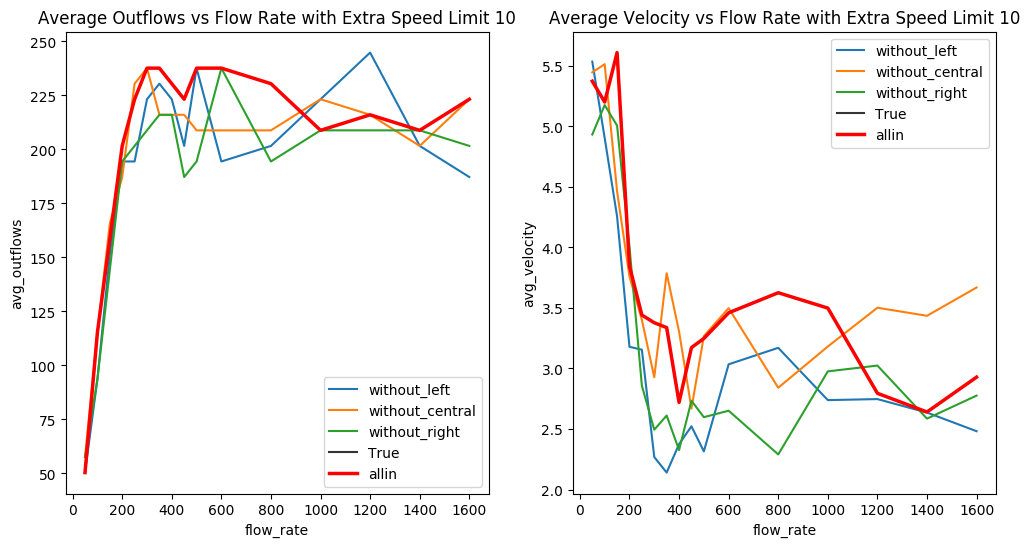

/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/op

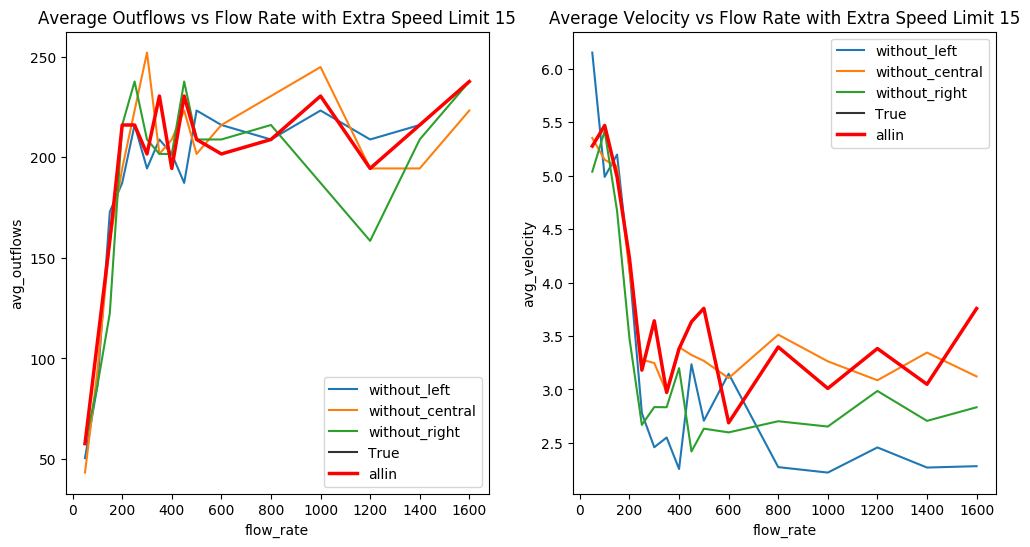

/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/op

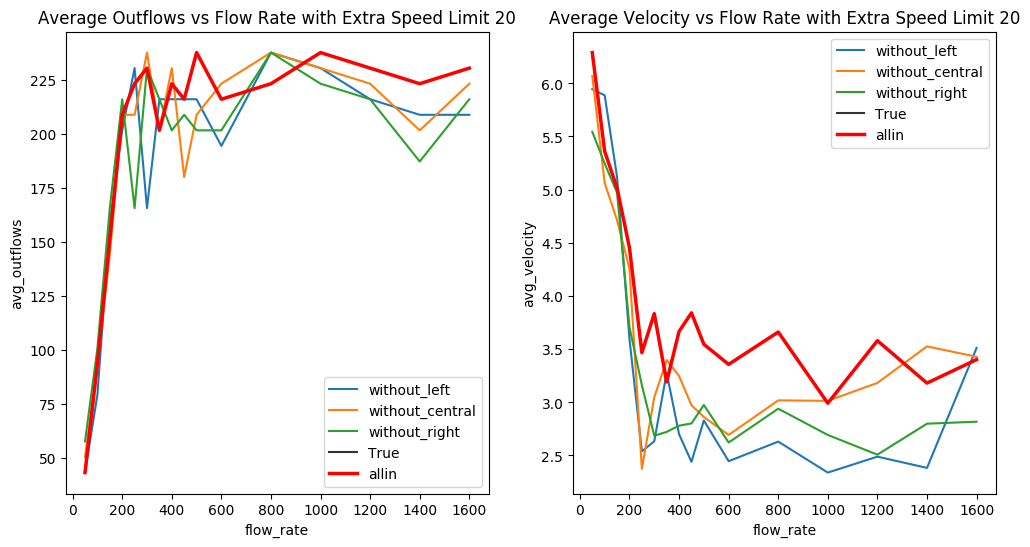

/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/flow/lib/python3.7/site-packages/matplotlib-3.1.0-py3.7-macosx-10.7-x86_64.egg/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/op

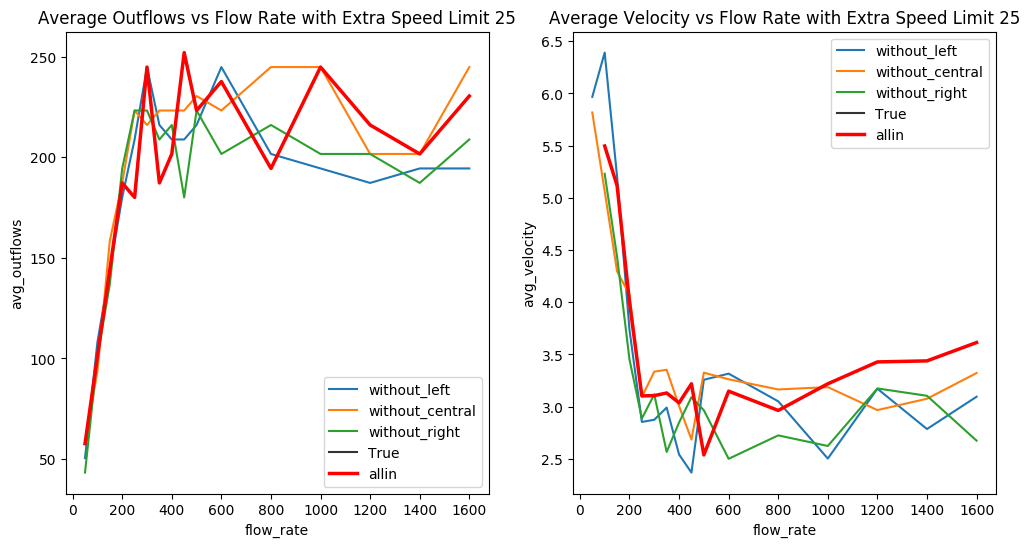

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# extra_speed = 15 # [10,15,20,25]
for extra_speed in [10,15,20,25]:
    df_plot = df[df['speed_limit_extra'] == extra_speed] 
    df_plot
    # 设置图形的整体大小
    plt.figure(figsize=(12, 6))

    # 创建第一个子图，显示 Average Outflows vs Flow Rate
    plt.subplot(1, 2, 1)  # 1行2列中的第1个
    # 绘制所有线，除了 'allin'
    sns.lineplot(data=df_plot[df_plot['road_mode'] != 'allin'], x='flow_rate', y='avg_outflows', hue='road_mode', style=True, dashes=True)
    # 强调 'allin' 的线
    sns.lineplot(data=df_plot[df_plot['road_mode'] == 'allin'], x='flow_rate', y='avg_outflows', color='red', linewidth=2.5, label='allin')
    plt.title(f'Average Outflows vs Flow Rate with Extra Speed Limit {extra_speed}')

    # 创建第二个子图，显示 Average Velocity vs Flow Rate
    plt.subplot(1, 2, 2)  # 1行2列中的第2个
    # 绘制所有线，除了 'allin'
    sns.lineplot(data=df_plot[df_plot['road_mode'] != 'allin'], x='flow_rate', y='avg_velocity', hue='road_mode', style=True, dashes=True)
    # 强调 'allin' 的线
    sns.lineplot(data=df_plot[df_plot['road_mode'] == 'allin'], x='flow_rate', y='avg_velocity', color='red', linewidth=2.5, label='allin')
    plt.title('Average Velocity vs Flow Rate with Extra Speed Limit {}'.format(extra_speed))

    # 显示整个图表
    plt.show()
